In [37]:
from google.colab import drive
drive.mount("/content/drive/")
dires = '/content/drive/MyDrive/Trabajos/EstEnvigado'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [38]:
##ANALISIS DE DATOS METEREOLOGICOS PARA MEDELLIN Y ENVIGADO
#datos obtenidos del SIATA

#Autor: Felipe Orozco

#importamos librerias:
import os                              #para interactuar con los directorios
import numpy as np                     #para operaciones matematicas
import pandas as pd                    #para tablas
from datetime import datetime
import matplotlib.pyplot as plt        #para graficas


Temp =  '/content/drive/MyDrive/Trabajos/EstEnvigado/Datos Medellin/Temp'
Presion = '/content/drive/MyDrive/Trabajos/EstEnvigado/Datos Medellin/Presion'
Viento = '/content/drive/MyDrive/Trabajos/EstEnvigado/Datos Medellin/Viento'
Humedad = '/content/drive/MyDrive/Trabajos/EstEnvigado/Datos Medellin/Humedad'
Precip = '/content/drive/MyDrive/Trabajos/EstEnvigado/Datos Medellin/Precip'


def juntar_csv(Temp):
  #PARA TEMPERATURA
  # Crear una lista vacía para almacenar los DataFrames
  dfs = []

  # Recorrer todos los archivos en la carpeta
  for filename in os.listdir(Temp):
      if filename.endswith('.csv'):
          # Construir la ruta completa al archivo
          file_path = os.path.join(Temp, filename)
          # Cargar el archivo CSV en un DataFrame
          df = pd.read_csv(file_path)
          # Agregar el DataFrame a la lista
          dfs.append(df)

  # Concatenar todos los DataFrames en uno solo
  TTemp = pd.concat(dfs, ignore_index=True)

  return TTemp








In [39]:
def filtrar_calidad(df, variable):
  df_filtrado = df.loc[df['Calidad'] == 1, ["fecha_hora", variable]]
  return df_filtrado




In [40]:
dfs_temp = juntar_csv(Temp)
dfs_Pre = juntar_csv(Presion)
dfs_Viento = juntar_csv(Viento)
dfs_Humedad = juntar_csv(Humedad)
dfs_Precip = juntar_csv(Precip)




In [41]:
dfs_temp = filtrar_calidad(dfs_temp, "Temperatura")
dfs_Pre = filtrar_calidad(dfs_Pre, "Presion")
dfs_Viento = filtrar_calidad(dfs_Viento, "Velocidad_Prom")
dfs_Humedad = filtrar_calidad(dfs_Humedad, "Humedad")
dfs_Precip = filtrar_calidad(dfs_Precip, "P1")




In [42]:
df_dic = {'Temperatura': dfs_temp, 
          'Presion': dfs_Pre,
          'Velocidad_Prom': dfs_Viento,
          'Humedad': dfs_Humedad,
          'P1':dfs_Precip}

In [43]:
df_new = {}
for key in df_dic:
    # Accedemos al dataframe correspondiente
    df = df_dic[key]
    df["fecha_hora"]= pd.to_datetime(df["fecha_hora"])

    # Asignar las fechas y horas como índices del DataFrame
    df.set_index(df["fecha_hora"], inplace=True)

    df = df.drop('fecha_hora', axis=1)
    df = df.sort_values(by=['fecha_hora'])
    df_new[key] = df




In [44]:
num_faltantes = {}

for key in df_new:
    # Accedemos al dataframe correspondiente
    df = df_new[key]
    # Reemplazar el valor "-999" con el valor nulo predeterminado de Python, que es None
    df = df.replace(-999.00, np.nan)

    # Utilizar la función isnull() para detectar valores nulos en el conjunto de datos
    valores_nulos = df.isnull()

    # Utilizar la función sum() para contar el número de valores nulos en cada columna
    num_valores_nulos_por_columna = valores_nulos.sum()

    # Imprimir el número de valores nulos en cada columna
    num_faltantes[key] = float(num_valores_nulos_por_columna)
    df_new[key] = df

# Recorremos todas las claves y valores del diccionario
for clave, valor in num_faltantes.items():
    print(f"Datos faltantes de {clave}", valor)

Datos faltantes de Temperatura 0.0
Datos faltantes de Presion 1.0
Datos faltantes de Velocidad_Prom 0.0
Datos faltantes de Humedad 0.0
Datos faltantes de P1 1.0


In [45]:
num_faltantes = {}

for key in df_new:
    # Accedemos al dataframe correspondiente
    df = df_new[key]
    # Reemplazar el valor "-999" con el valor nulo predeterminado de Python, que es None
    df = df.dropna()

    # Utilizar la función isnull() para detectar valores nulos en el conjunto de datos
    valores_nulos = df.isnull()

    # Utilizar la función sum() para contar el número de valores nulos en cada columna
    num_valores_nulos_por_columna = valores_nulos.sum()

    # Imprimir el número de valores nulos en cada columna
    num_faltantes[key] = float(num_valores_nulos_por_columna)
    df_new[key] = df

# Recorremos todas las claves y valores del diccionario
for clave, valor in num_faltantes.items():
    print(f"Datos faltantes de {clave}", valor)

Datos faltantes de Temperatura 0.0
Datos faltantes de Presion 0.0
Datos faltantes de Velocidad_Prom 0.0
Datos faltantes de Humedad 0.0
Datos faltantes de P1 0.0


In [46]:
for key in df_new:
    # Accedemos al dataframe correspondiente
    df = df_new[key]
    df_filtrado = df.loc[(df[key] > 0.1)]
    df_new[key] = df_filtrado

In [47]:
max_values = {}

for key in df_new:
    # Accedemos al dataframe correspondiente
    df = df_new[key]

    max_values[key] = float(df.max())
  
# Recorremos todas las claves y valores del diccionario
for clave, valor in max_values.items():
    print(f"Valor máximo de la {clave}", valor)


Valor máximo de la Temperatura 32.3
Valor máximo de la Presion 856.1
Valor máximo de la Velocidad_Prom 8.2
Valor máximo de la Humedad 89.5
Valor máximo de la P1 2.3


In [48]:
min_values = {}

for key in df_new:
    # Accedemos al dataframe correspondiente
    df = df_new[key]

    df_filtrado = df.loc[(df[key] > 0.1)]
    

    min_values[key] = float(df_filtrado.min())
  
# Recorremos todas las claves y valores del diccionario
for clave, valor in min_values.items():
    print(f"Valor mínimo de la {clave}", valor)

Valor mínimo de la Temperatura 16.0
Valor mínimo de la Presion 636.5
Valor mínimo de la Velocidad_Prom 0.2
Valor mínimo de la Humedad 17.1
Valor mínimo de la P1 0.11


In [49]:
import numpy as np
import pandas as pd

class Nivel_serie():
    def __init__(self, tiempo, serie):
        self.tiempo = tiempo
        self.serie = serie
    
    def calculo(self):
        """
        Función para calcular la tendencia por el método de regresión lineal
        :return: array con la tendencia de la serie temporal
        """
        
        valor_tiempo_media = self.tiempo.mean()
        tiempo_media_0 = self.tiempo - valor_tiempo_media

        beta_0= self.serie.mean()

        beta_1_num = 0
        beta_1_dem = 0
        for i in range (len(tiempo_media_0)):
            auxzt = (self.serie[i]-beta_0)*tiempo_media_0[i]
            beta_1_num += auxzt
            auxt2 = tiempo_media_0[i] * tiempo_media_0[i]
            beta_1_dem  += auxt2

        beta_1 = beta_1_num / beta_1_dem

        tendencia = beta_0 + beta_1*tiempo_media_0
    
        return tendencia

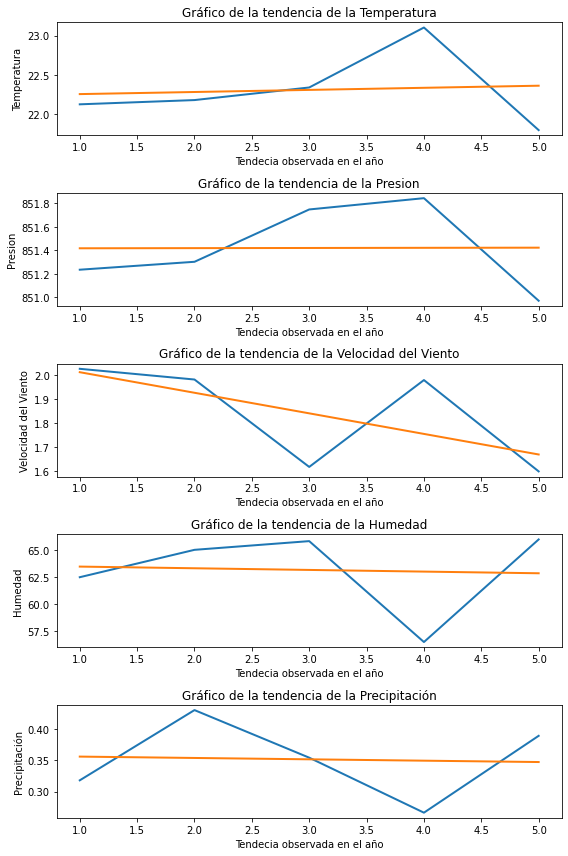

In [50]:
import matplotlib.pyplot as plt

# Definir una lista de variables para iterar
Nombre_grafico = ['Temperatura', 'Presion', 'Velocidad del Viento', 'Humedad',
                  'Precipitación']

# Crear una figura con subplots
fig, axs = plt.subplots(nrows=len(Nombre_grafico), ncols=1, figsize=(8, 12))

i=0
for key in df_new:
    # Accedemos al dataframe correspondiente
    df = df_new[key]
    tiempo = np.linspace(1, len(df[key].resample('Q')), len(df[key].resample('Q')))
    serie = df[key].resample('Q').mean()
    nivel_serie = Nivel_serie(tiempo, serie)
    tendencia = nivel_serie.calculo()
    axs[i].plot(tiempo, serie, linewidth=2.0)
    axs[i].plot(tiempo, tendencia, linewidth=2.0)
    axs[i].set_xlabel('Tendecia observada en el año')
    axs[i].set_ylabel(Nombre_grafico[i])
    axs[i].set_title(f'Gráfico de la tendencia de la {Nombre_grafico[i]}')
    i+=1


# Ajustar el espacio entre los subplots y mostrar la figura
fig.tight_layout()
nombre_archivo = 'grafico tendencias de als varaibles.png'
plt.savefig("/content/drive/MyDrive/Trabajos/EstEnvigado/Datos Medellin/" + nombre_archivo)

# Mostrar la figura
plt.show()


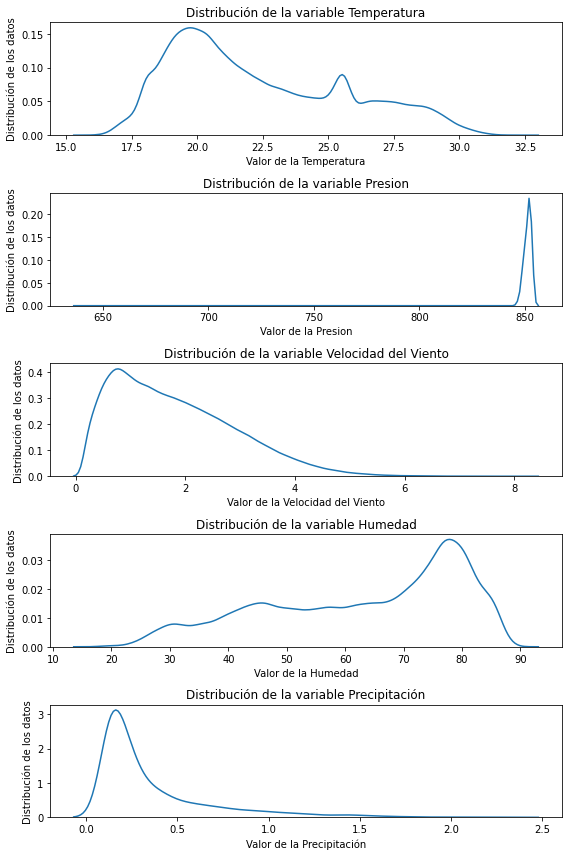

In [51]:
import seaborn as sns
# Definir una lista de variables
Nombre_grafico = ['Temperatura', 'Presion', 'Velocidad del Viento', 'Humedad',
                  'Precipitación']

# Crear una figura con subplots
fig, axs = plt.subplots(nrows=len(Nombre_grafico), ncols=1, figsize=(8, 12))

# Iterar sobre cada variable y crear un gráfico de densidad de kernel en su respectivo subplot
i=0
for key in df_new:
  df = df_new[key]
  sns.kdeplot(df[key], ax=axs[i])
  axs[i].set_title(f'Distribución de la variable {Nombre_grafico[i]}')
  axs[i].set_xlabel(f'Valor de la {Nombre_grafico[i]}')
  axs[i].set_ylabel('Distribución de los datos')
  i+=1

# Ajustar el espacio entre los subplots
fig.tight_layout()

nombre_archivo = 'distribución de los datos.png'
plt.savefig("/content/drive/MyDrive/Trabajos/EstEnvigado/Datos Medellin/" + nombre_archivo)

# Mostrar la figura
plt.show()

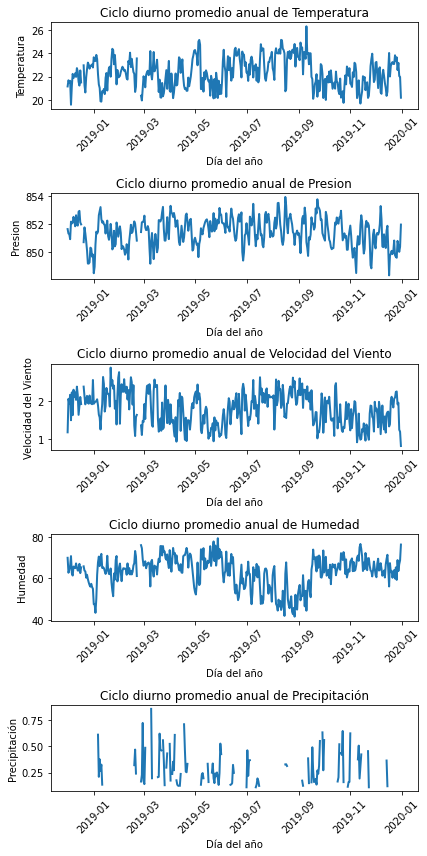

In [52]:
# Definir la lista de variables a analizar
# Definir una lista de variables
Nombre_grafico = ['Temperatura', 'Presion', 'Velocidad del Viento', 'Humedad',
                  'Precipitación']

# Crear subplots para los gráficos de las tendencias
fig, axs = plt.subplots(nrows=len(Nombre_grafico), ncols=1, figsize=(6, 12))

i=0
# Iterar sobre las variables y crear un gráfico por variable
for key in df_new:
    df = df_new[key]
    
    #diurno_mensual = df.groupby(df.index.dayofyear)[key].mean()
    serie = df[key].resample('D').mean()
    # Graficar la tendencia para la variable
    axs[i].plot(serie.index, serie, linewidth=2.0)
    axs[i].set_ylabel(Nombre_grafico[i])
    axs[i].set_xlabel('Día del año')
    axs[i].set_title(f'Ciclo diurno promedio anual de {Nombre_grafico[i]}')
    axs[i].xaxis.set_tick_params(which='both', labelbottom=True, rotation=45)
    i+=1

# Ajustar los espacios entre los subplots y mostrar los gráficos
plt.tight_layout()

nombre_archivo = 'Ciclo diurno promedio anual.png'
plt.savefig("/content/drive/MyDrive/Trabajos/EstEnvigado/Graficos/Grafico Estación Medellin/" + nombre_archivo)

plt.show()

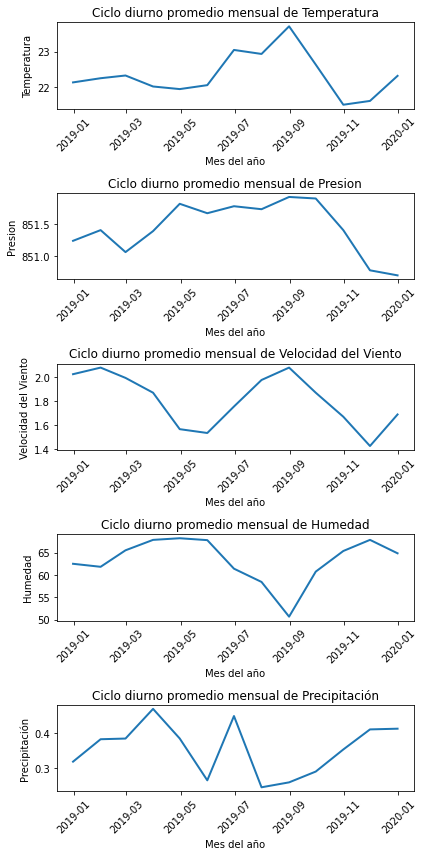

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Definir la lista de variables a analizar
Nombre_grafico = ['Temperatura', 'Presion', 'Velocidad del Viento', 'Humedad',
                  'Precipitación']


# 2. Crear subplots para cada variable
fig, axs = plt.subplots(nrows=len(Nombre_grafico), ncols=1, figsize=(6, 12))

i=0
# Iterar sobre las variables y crear un gráfico por variable
for key in df_new:
    df = df_new[key]
    serie = df[key].resample('M').mean()
    # Graficar la tendencia para la variable
    axs[i].plot(serie.index, serie, linewidth=2.0)
    axs[i].set_ylabel(Nombre_grafico[i])
    axs[i].set_xlabel('Mes del año')
    axs[i].set_title(f'Ciclo diurno promedio mensual de {Nombre_grafico[i]}')
    axs[i].xaxis.set_tick_params(which='both', labelbottom=True, rotation=45)
    i+=1

    
# 6. Ajustar los espacios entre los subplots y mostrar el gráfico
plt.tight_layout()
nombre_archivo = 'Ciclo diurno promedio mensual.png'
plt.savefig("/content/drive/MyDrive/Trabajos/EstEnvigado/Graficos/Grafico Estación Medellin/" + nombre_archivo)
plt.show()


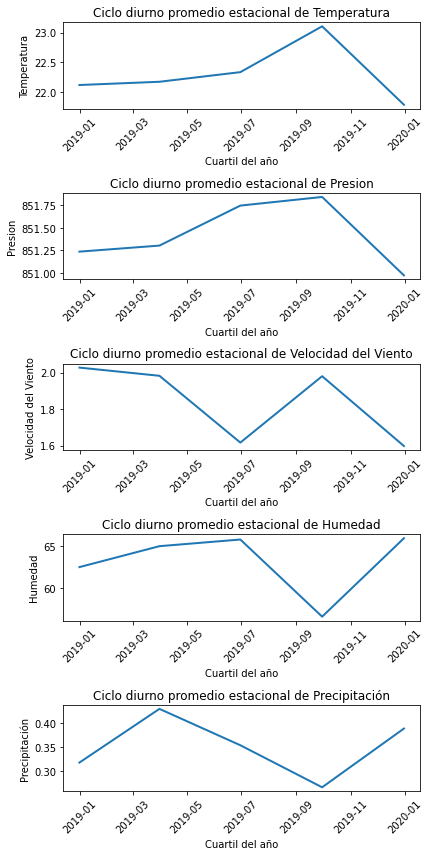

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Definir la lista de variables a analizar
Nombre_grafico = ['Temperatura', 'Presion', 'Velocidad del Viento', 'Humedad',
                  'Precipitación']


# 2. Crear subplots para cada variable
fig, axs = plt.subplots(nrows=len(Nombre_grafico), ncols=1, figsize=(6, 12))

i=0
# Iterar sobre las variables y crear un gráfico por variable
for key in df_new:
    df = df_new[key]
    serie = df[key].resample('Q').mean()
    # Graficar la tendencia para la variable
    axs[i].plot(serie.index, serie, linewidth=2.0)
    axs[i].set_ylabel(Nombre_grafico[i])
    axs[i].set_xlabel('Cuartil del año')
    axs[i].set_title(f'Ciclo diurno promedio estacional de {Nombre_grafico[i]}')
    axs[i].xaxis.set_tick_params(which='both', labelbottom=True, rotation=45)
    i+=1

    
# 6. Ajustar los espacios entre los subplots y mostrar el gráfico
plt.tight_layout()
nombre_archivo = 'Ciclo diurno promedio estacional.png'
plt.savefig("/content/drive/MyDrive/Trabajos/EstEnvigado/Graficos/Grafico Estación Medellin/" + nombre_archivo)
plt.show()
